In [14]:
#Importamos las librerias requeridas para el EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from wordcloud import WordCloud, ImageColorGenerator
warnings.filterwarnings('ignore')
sns.set_theme()

In [2]:
# Importar steam
print("importando steam...")
steam = pd.read_csv('./assets/steam.csv')
# Visualizamos los datos
print(steam.shape)
steam.head(5)

importando steam...
(6564545, 13)


,publisher,genres,app_name,release_date,price,item_id_x,user_id,steam_id,item_name,playtime_forever,playtime_2weeks,sentiment_analysis,item_id_y
0,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,1,244210
1,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,0,440
2,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,2,376920
3,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,1,257750
4,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,0,221910


In [3]:
#Informacion de los datos
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564545 entries, 0 to 6564544
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   publisher           object 
 1   genres              object 
 2   app_name            object 
 3   release_date        float64
 4   price               float64
 5   item_id_x           int64  
 6   user_id             object 
 7   steam_id            int64  
 8   item_name           object 
 9   playtime_forever    int64  
 10  playtime_2weeks     int64  
 11  sentiment_analysis  int64  
 12  item_id_y           int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 651.1+ MB


In [4]:
# Hacemos un conteo de los nulos
steam.isnull().sum()

publisher             216195
genres                139210
app_name                4725
release_date          114425
price                 128735
item_id_x                  0
user_id                    0
steam_id                   0
item_name                  0
playtime_forever           0
playtime_2weeks            0
sentiment_analysis         0
item_id_y                  0
dtype: int64

In [5]:
# Realizamos una descripcion estadistica de los datos
steam.describe()

,release_date,price,item_id_x,steam_id,playtime_forever,playtime_2weeks,sentiment_analysis,item_id_y
count,6.450120e+06,6.435810e+06,6.564545e+06,6.564545e+06,6.564545e+06,6.564545e+06,6.564545e+06,6.564545e+06
mean,2.011425e+03,1.207873e+01,1.889563e+05,7.656120e+16,9.425669e+02,9.636305e+00,1.288487e+00,1.881317e+05
std,4.257085e+00,1.318812e+01,1.337649e+05,3.894492e+07,5.514724e+03,1.448168e+02,6.964107e-01,1.294341e+05
min,1.983000e+03,0.000000e+00,1.000000e+01,7.656120e+16,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,2.010000e+03,4.990000e+00,3.870000e+04,7.656120e+16,0.000000e+00,0.000000e+00,1.000000e+00,4.296000e+04
50%,2.013000e+03,9.990000e+00,2.208200e+05,7.656120e+16,4.400000e+01,0.000000e+00,1.000000e+00,2.211000e+05
75%,2.014000e+03,1.999000e+01,2.877000e+05,7.656120e+16,3.340000e+02,0.000000e+00,2.000000e+00,2.715900e+05
max,2.018000e+03,7.717100e+02,5.307200e+05,7.656120e+16,6.427730e+05,1.996700e+04,2.000000e+00,5.273400e+05


In [6]:
# Realizamos una descripcion estadistica de tipo texto
tipo_texto = steam.select_dtypes(include=['object']).columns
df_texto = steam[tipo_texto]
df_texto.describe()

,publisher,genres,app_name,user_id,item_name
count,6348350,6425335,6559820,6564545,6564545
unique,4008,585,8981,22579,8989
top,Valve,['Action'],Garry's Mod,phrostb,Garry's Mod
freq,421523,1121775,46315,60084,46315


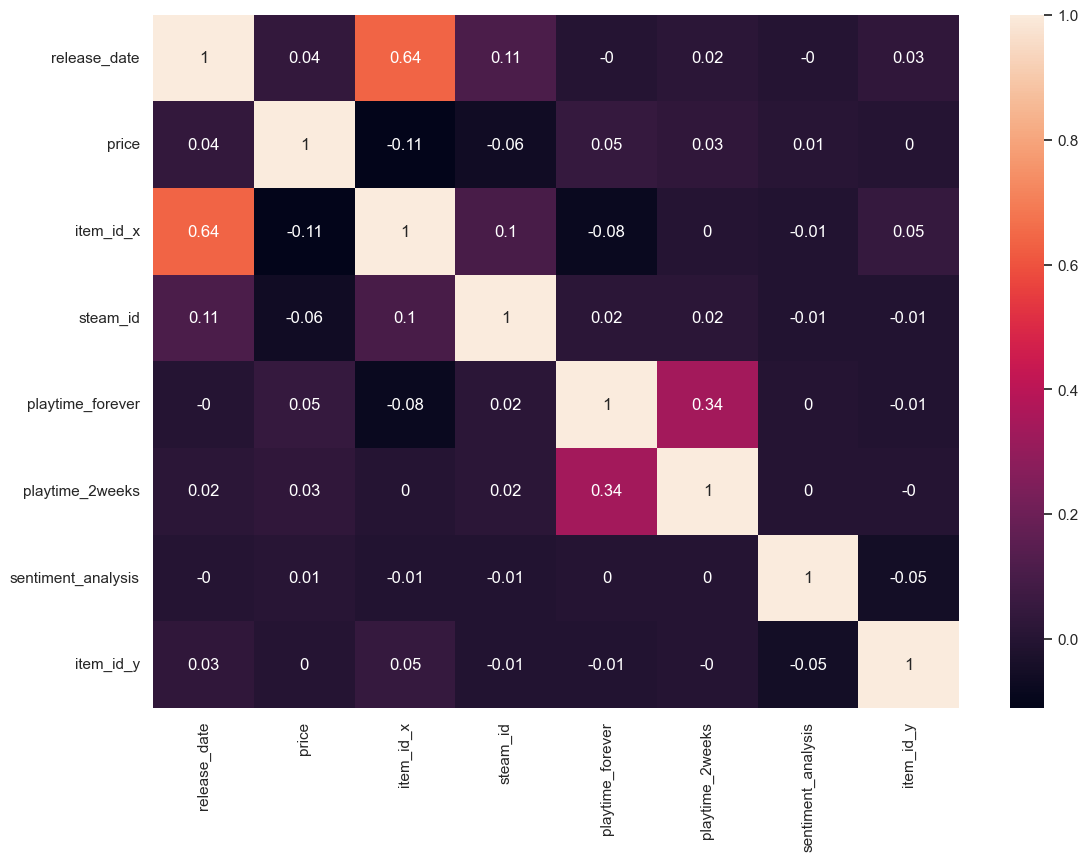

In [7]:
# Generamos un mapa de calor con las correlaciones de los datos
df_numerico = steam.select_dtypes(include=['number']) 
corr = df_numerico.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=corr, annot=True)
plt.show()

In [8]:
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1 
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
mascaras = (df_numerico < limite_inf) | (df_numerico > limite_sup)
valores_atipicos = df_numerico[mascaras]
valores_atipicos

,release_date,price,item_id_x,steam_id,playtime_forever,playtime_2weeks,sentiment_analysis,item_id_y
0,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6564540,NaN,NaN,NaN,NaN,1269.0,NaN,NaN,NaN
6564541,NaN,NaN,NaN,NaN,985.0,NaN,NaN,NaN
6564542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6564543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


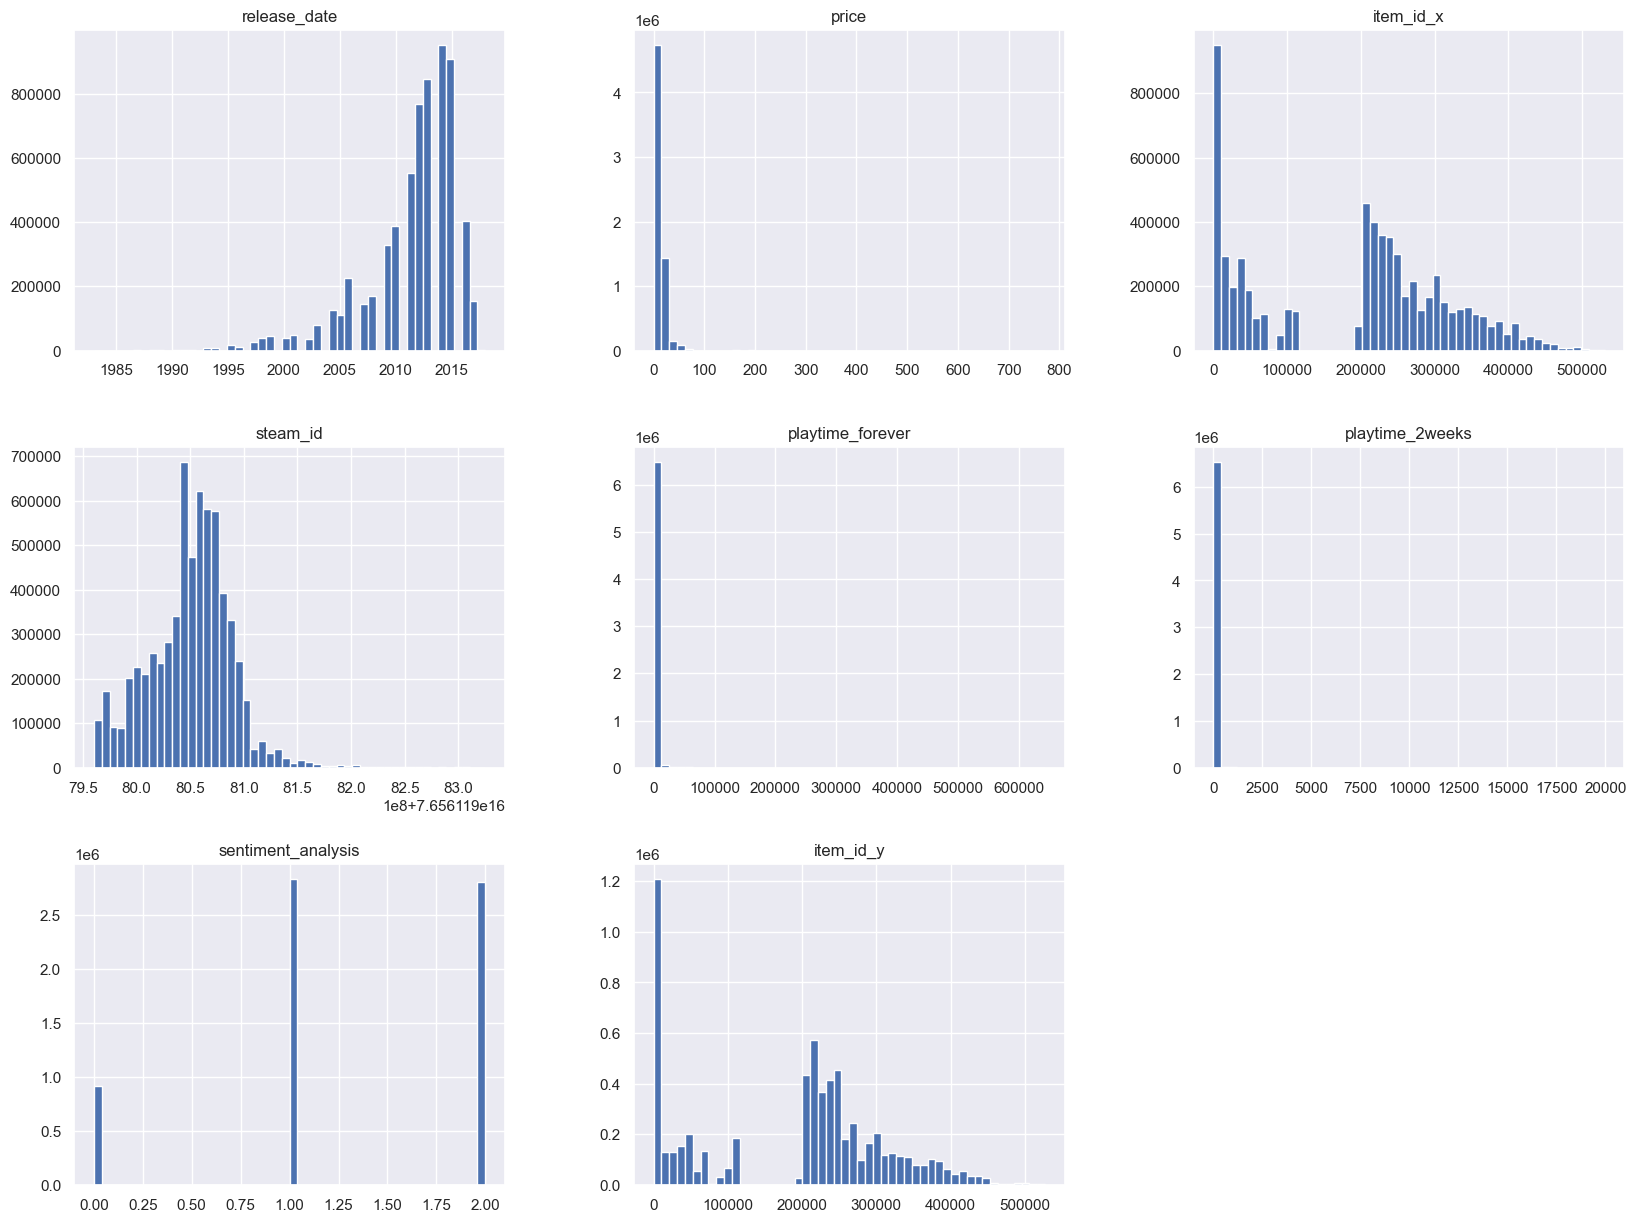

In [9]:
#Realizamos un histograma
steam.hist(bins = 50, figsize= (20,15))
plt.show()

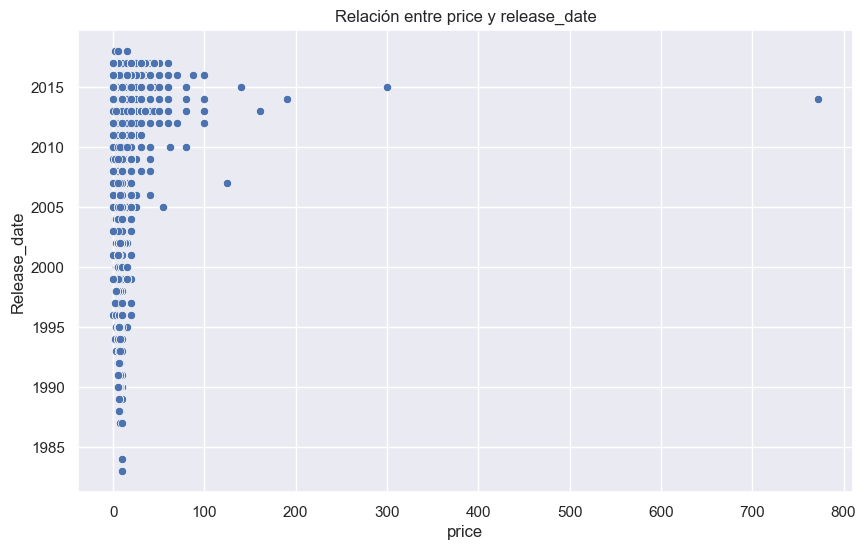

In [10]:
#Generamos una nube de palabras
# Destacar un patrón importante
# Veamos la relación entre el budget y la revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=steam, x='price', y='release_date')
plt.title('Relación entre price y release_date')
plt.xlabel('price')
plt.ylabel('Release_date')
plt.show()


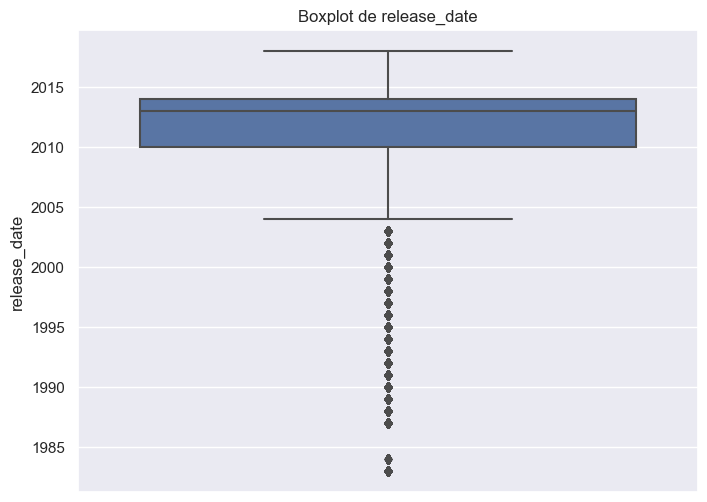

In [12]:
# Destacar los outliers
# Veamos el boxplot de la variable 'genres'
plt.figure(figsize=(8, 6))
sns.boxplot(data=steam, y='release_date')
plt.title('Boxplot de release_date')
plt.ylabel('release_date')
plt.show()

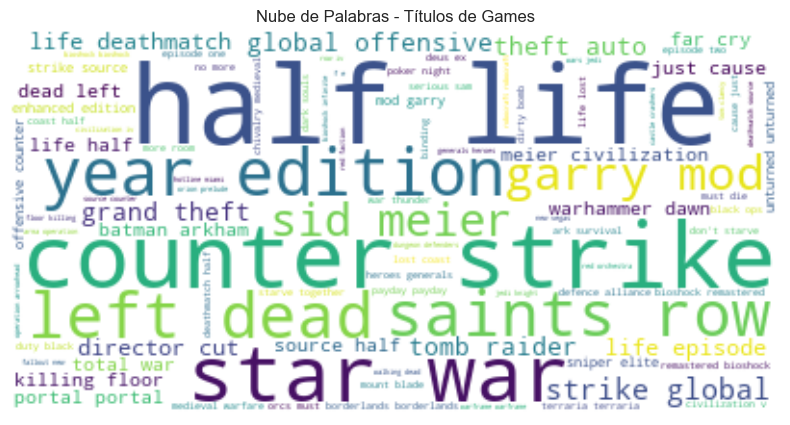

In [25]:
# Generamos una nube de palabras de la columna 'app_name'
title_words = ' '.join(steam['app_name'].astype(str))
title_words = title_words.lower()
stopwords = ["to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Títulos de Games')
plt.show()

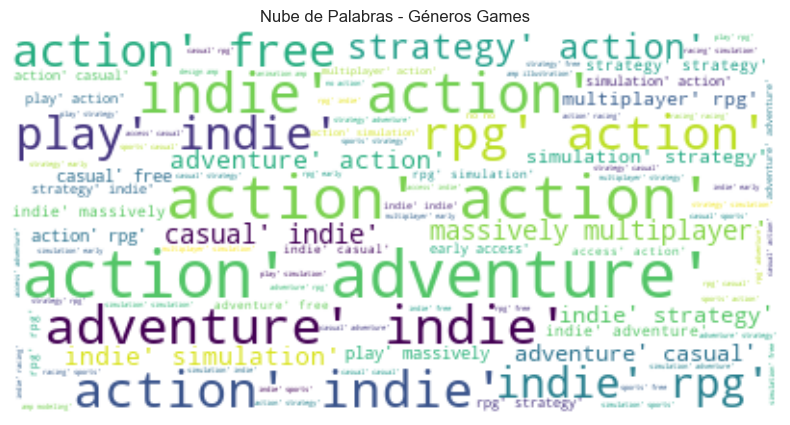

In [26]:
# Generamos una nube de palabras de la columna 'genres'
title_words = ' '.join(steam['genres'].astype(str))
title_words = title_words.lower()
stopwords = ["to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Géneros Games')
plt.show()

In [19]:
# Hacemos un conteo en la columna 'genres'
steam['genres'] = steam['genres'].astype(str)
genres_counts = steam['genres'].value_counts().sort_values(ascending=False)
print(genres_counts)

genres
['Action']                                                                        1121775
['Action', 'Adventure']                                                            420435
['Action', 'Indie']                                                                331257
['Strategy']                                                                       285048
['Action', 'Adventure', 'Indie']                                                   218756
                                                                                   ...   
['Action', 'Adventure', 'Indie', 'Racing', 'Early Access']                              2
['Action', 'Massively Multiplayer', 'Simulation', 'Early Access']                       2
['Action', 'Adventure', 'Massively Multiplayer', 'Simulation', 'Early Access']          1
['Action', 'Casual', 'Indie', 'Simulation', 'Sports', 'Strategy']                       1
['Photo Editing']                                                                       1
Nam

In [21]:
# Hacemos un conteo en la columna 'sentiment'
steam['sentiment_analysis'] = steam['sentiment_analysis'].astype(str)
sentiment_counts = steam['sentiment_analysis'].value_counts().sort_values(ascending=False)
print(sentiment_counts)


sentiment_analysis
1    2834486
2    2811924
0     918135
Name: count, dtype: int64


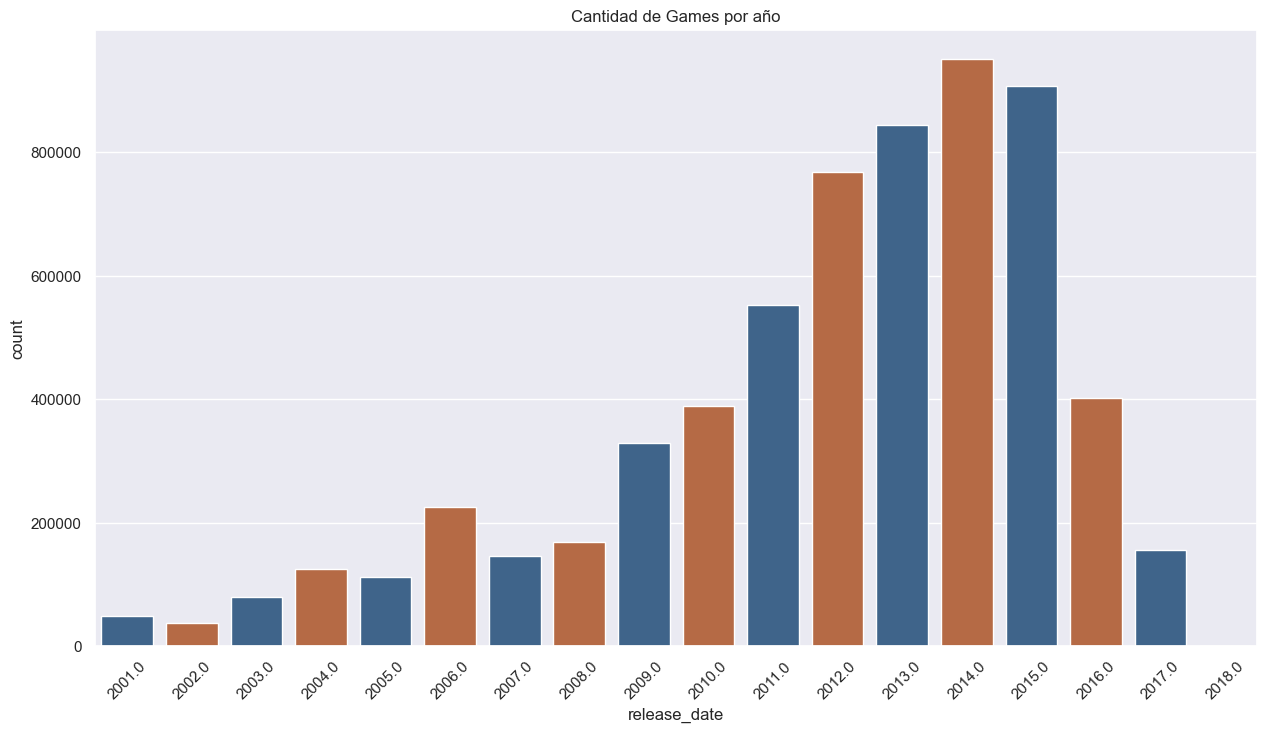

In [22]:
#Generamos una grafica con los juegos por años
# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 8))

# Definir los colores corporativos utilizando valores RGB
color1 = (50/255, 100/255, 150/255)  # Ejemplo de color corporativo 1
color2 = (200/255, 100/255, 50/255)  # Ejemplo de color corporativo 2

# Crear una lista de colores personalizados
colors = [color1, color2]

# Crear el gráfico de barras utilizando seaborn y los colores personalizados
plot = sns.countplot(x=steam['release_date'][steam['release_date'] > 2000], palette=colors)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Agregar título al gráfico
plt.title('Cantidad de Games por año')

# Mostrar el gráfico
plt.show()

In [23]:
steam['genres'] = steam['genres'].replace('nan', 'NO').astype(str)

In [24]:
steam.head()

,publisher,genres,app_name,release_date,price,item_id_x,user_id,steam_id,item_name,playtime_forever,playtime_2weeks,sentiment_analysis,item_id_y
0,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,1,244210
1,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,0,440
2,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,2,376920
3,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,1,257750
4,Stainless Games Ltd,"['Action', 'Indie', 'Racing']",Carmageddon Max Pack,1997.0,9.99,282010,UTNerd24,76561198053985682,Carmageddon Max Pack,5,0,0,221910
